## Task #4 

## Exploratory Data Analysis - Terrorism

### Author : Gaurav Khare

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ 

● As a security/defense analyst, try to find out the hot zone of terrorism. 

● What all security issues and insights you can derive by EDA? 

● Dataset: https://bit.ly/2TK5Xn5


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Reading data 
data = pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")
data_original = pd.read_csv(r"globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")
print("Data imported successfully")

Data imported successfully


In [3]:
# First 5 Rows of the dataset
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
# Last 5 Rows of the dataset
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

In [5]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region',
                     'attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded',
                     'summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                     'motive':'Motive'},inplace=True)

In [7]:
#data.apply(lambda x: x.value_counts()).T.stack()

In [8]:
# Determining the shape of the dataset
print("There are total %d columns in the dataset." %data.shape[1])
print("There are total %d rows in the dataset." %data.shape[0])

There are total 135 columns in the dataset.
There are total 181691 rows in the dataset.


In [9]:
# Basic Information of the dataset
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   eventid             181691 non-null  int64  
 1   Year                181691 non-null  int64  
 2   Month               181691 non-null  int64  
 3   Day                 181691 non-null  int64  
 4   approxdate          9239 non-null    object 
 5   extended            181691 non-null  int64  
 6   resolution          2220 non-null    object 
 7   country             181691 non-null  int64  
 8   Country             181691 non-null  object 
 9   region              181691 non-null  int64  
 10  Region              181691 non-null  object 
 11  provstate           181270 non-null  object 
 12  city                181257 non-null  object 
 13  latitude            177135 non-null  float64
 14  longitude           177134 non-null  float64
 15  specificity         181685 non-nu

In [10]:
# Determining the Datatype of the dataset
data.dtypes

eventid                 int64
Year                    int64
Month                   int64
Day                     int64
approxdate             object
extended                int64
resolution             object
country                 int64
Country                object
region                  int64
Region                 object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
Summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
AttackType             object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [11]:
# Determining the unique values in the dataset
data.nunique()

eventid               181691
Year                      47
Month                     13
Day                       32
approxdate              2244
extended                   2
resolution              1859
country                  205
Country                  205
region                    12
Region                    12
provstate               2855
city                   36674
latitude               48322
longitude              48039
specificity                5
vicinity                   3
location               44109
Summary               112492
crit1                      2
crit2                      2
crit3                      2
doubtterr                  3
alternative                5
alternative_txt            5
multiple                   2
success                    2
suicide                    2
attacktype1                9
AttackType                 9
attacktype2                9
attacktype2_txt            9
attacktype3                8
attacktype3_txt            8
targtype1     

In [12]:
#Determining the missing values in the dataset
data.isnull().sum()

eventid                    0
Year                       0
Month                      0
Day                        0
approxdate            172452
extended                   0
resolution            179471
country                    0
Country                    0
region                     0
Region                     0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
Summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
AttackType                 0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

Finding Total number of null values in a dataset

In [13]:
round(100*data.isnull().sum()/len(data.index),2).sort_values(ascending=False)

gsubname3             99.99
weaptype4             99.96
weaptype4_txt         99.96
weapsubtype4          99.96
weapsubtype4_txt      99.96
claimmode3            99.93
claimmode3_txt        99.93
gsubname2             99.91
divert                99.82
claim3                99.82
gname3                99.82
guncertain3           99.82
attacktype3_txt       99.76
attacktype3           99.76
ransomnote            99.72
ransompaidus          99.70
ransomamtus           99.69
claimmode2            99.66
claimmode2_txt        99.66
ransompaid            99.57
corp3                 99.44
targsubtype3_txt      99.40
targsubtype3          99.40
natlty3_txt           99.37
natlty3               99.37
target3               99.35
targtype3             99.35
targtype3_txt         99.35
ransomamt             99.26
weapsubtype3_txt      99.07
weapsubtype3          99.07
weaptype3_txt         98.97
weaptype3             98.97
claim2                98.96
guncertain2           98.92
gname2              

In [14]:
# dropping of columns where the missing pecentage is more than 20%
cols =data.columns[round(100*(data.isnull().sum()/len(data.index)),2)>20]
data.drop(cols, axis=1,inplace=True)

In [15]:
round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False)

weapsubtype1_txt    11.43
weapsubtype1        11.43
Wounded              8.98
targsubtype1_txt     5.71
targsubtype1         5.71
Killed               5.68
latitude             2.51
longitude            2.51
natlty1_txt          0.86
natlty1              0.86
Target               0.35
city                 0.24
provstate            0.23
guncertain1          0.21
ishostkid            0.10
specificity          0.00
vicinity             0.00
crit1                0.00
INT_ANY              0.00
Region               0.00
crit3                0.00
region               0.00
Country              0.00
country              0.00
extended             0.00
Day                  0.00
Month                0.00
Year                 0.00
crit2                0.00
AttackType           0.00
doubtterr            0.00
individual           0.00
INT_IDEO             0.00
INT_LOG              0.00
dbsource             0.00
property             0.00
Weapon_type          0.00
weaptype1            0.00
Group       

In [16]:
print("total number of null values = ",data.isnull().sum().sum())

total number of null values =  103194


In [17]:
#Determining the null values in the dataset
data.isna().sum().sort_values(ascending=False)

weapsubtype1        20768
weapsubtype1_txt    20768
Wounded             16311
targsubtype1        10373
targsubtype1_txt    10373
Killed              10313
longitude            4557
latitude             4556
natlty1_txt          1559
natlty1              1559
Target                636
city                  434
provstate             421
guncertain1           380
ishostkid             178
specificity             6
multiple                1
doubtterr               1
vicinity                0
INT_ANY                 0
Region                  0
crit2                   0
region                  0
Country                 0
country                 0
extended                0
Day                     0
Month                   0
Year                    0
crit1                   0
AttackType              0
crit3                   0
success                 0
suicide                 0
attacktype1             0
INT_MISC                0
targtype1               0
Target_type             0
Group       

In [18]:
data_na=data[['provstate', 'city', 'latitude', 'longitude', 'targsubtype1', 
              'targsubtype1_txt', 'Target', 'natlty1', 'natlty1_txt', 
              'guncertain1', 'weapsubtype1', 'weapsubtype1_txt', 'Killed', 'Wounded', 'ishostkid']]

In [19]:
data_na.head()

,provstate,city,latitude,longitude,targsubtype1,targsubtype1_txt,Target,natlty1,natlty1_txt,guncertain1,weapsubtype1,weapsubtype1_txt,Killed,Wounded,ishostkid
0,NaN,Santo Domingo,18.456792,-69.951164,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,0.0,NaN,NaN,1.0,0.0,0.0
1,Federal,Mexico city,19.371887,-99.086624,45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,0.0,NaN,NaN,0.0,0.0,1.0
2,Tarlac,Unknown,15.478598,120.599741,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,0.0,NaN,NaN,1.0,0.0,0.0
3,Attica,Athens,37.997490,23.762728,46.0,Embassy/Consulate,U.S. Embassy,217.0,United States,0.0,16.0,Unknown Explosive Type,NaN,NaN,0.0
4,Fukouka,Fukouka,33.580412,130.396361,46.0,Embassy/Consulate,U.S. Consulate,217.0,United States,0.0,NaN,NaN,NaN,NaN,0.0


In [20]:
data=data.dropna()

In [21]:
data.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
extended            0
country             0
Country             0
region              0
Region              0
provstate           0
city                0
latitude            0
longitude           0
specificity         0
vicinity            0
crit1               0
crit2               0
crit3               0
doubtterr           0
multiple            0
success             0
suicide             0
attacktype1         0
AttackType          0
targtype1           0
Target_type         0
targsubtype1        0
targsubtype1_txt    0
Target              0
natlty1             0
natlty1_txt         0
Group               0
guncertain1         0
individual          0
weaptype1           0
Weapon_type         0
weapsubtype1        0
weapsubtype1_txt    0
Killed              0
Wounded             0
property            0
ishostkid           0
dbsource            0
INT_LOG             0
INT_IDEO            0
INT_MISC  

In [22]:
# Checking for the Remaining dataset post dropping Missing and Null Values
balance_data=(len(data)/len(data_original))*100
balance_data

73.77470540643179

In [23]:
# I'm just take important data in whole dataset those I'm using further processing.
data = data[['Year','Month','Day','Country','Region','provstate','city','AttackType','Killed',
             'Wounded','Target','Group','Target_type','Weapon_type']]

In [24]:
print("Country with the most attack: ",data['Country'].value_counts().idxmax())
print('City with most attack: ',data['city'].value_counts().index[0])
print("Country with the min attack: ",data['Country'].value_counts().idxmin())
print('City with least attack: ',data['city'].value_counts().index[-1])
print('Region with most attack:',data['Region'].value_counts().idxmax())
print('Region with least attack:',data['Region'].value_counts().idxmin())
print('Year with most attack: ',data['Year'].value_counts().idxmax())
print('Year with least attack: ',data['Year'].value_counts().idxmin())
print('Month with most attack: ',data['Month'].value_counts().idxmax())
print('Month with min attack: ',data['Month'].value_counts().idxmin())
print('Group with most attack :',data['Group'].value_counts().index[1])
print('Most attack type: ',data['AttackType'].value_counts().idxmax())

Country with the most attack:  Iraq
City with most attack:  Baghdad
Country with the min attack:  International
City with least attack:  Reasi district
Region with most attack: Middle East & North Africa
Region with least attack: Australasia & Oceania
Year with most attack:  2014
Year with least attack:  1973
Month with most attack:  5
Month with min attack:  0
Group with most attack : Taliban
Most attack type:  Bombing/Explosion


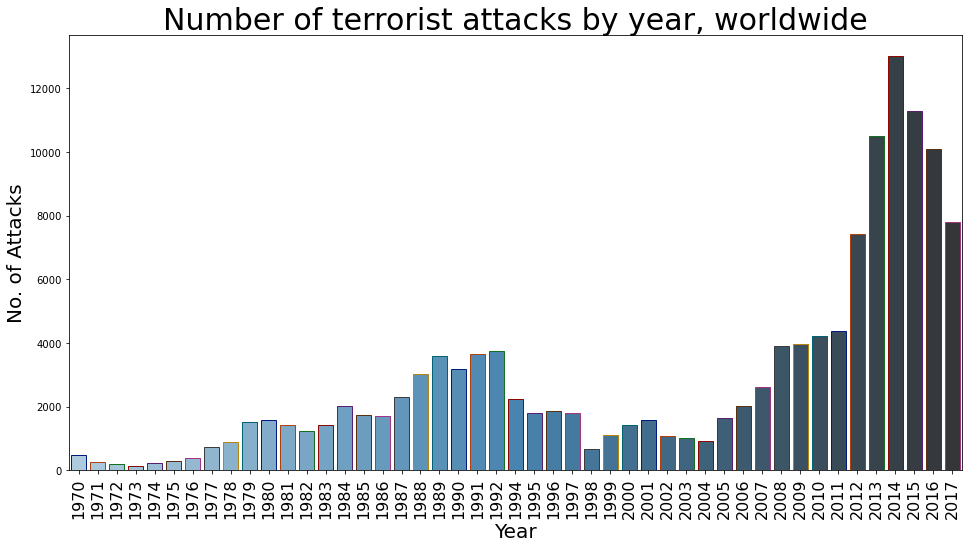

In [25]:
year = data['Year'].value_counts().to_frame().reset_index()
year.columns = ['Year', 'Total Attacks']
plt.subplots(figsize=(16,8))
sns.barplot(x=year['Year'], y=year['Total Attacks'], palette='Blues_d', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90,fontsize = 16)
plt.title("Number of terrorist attacks by year, worldwide",fontsize = 30)
plt.xlabel('Year',fontsize= 20)
plt.ylabel('No. of Attacks',fontsize = 20)
plt.show()

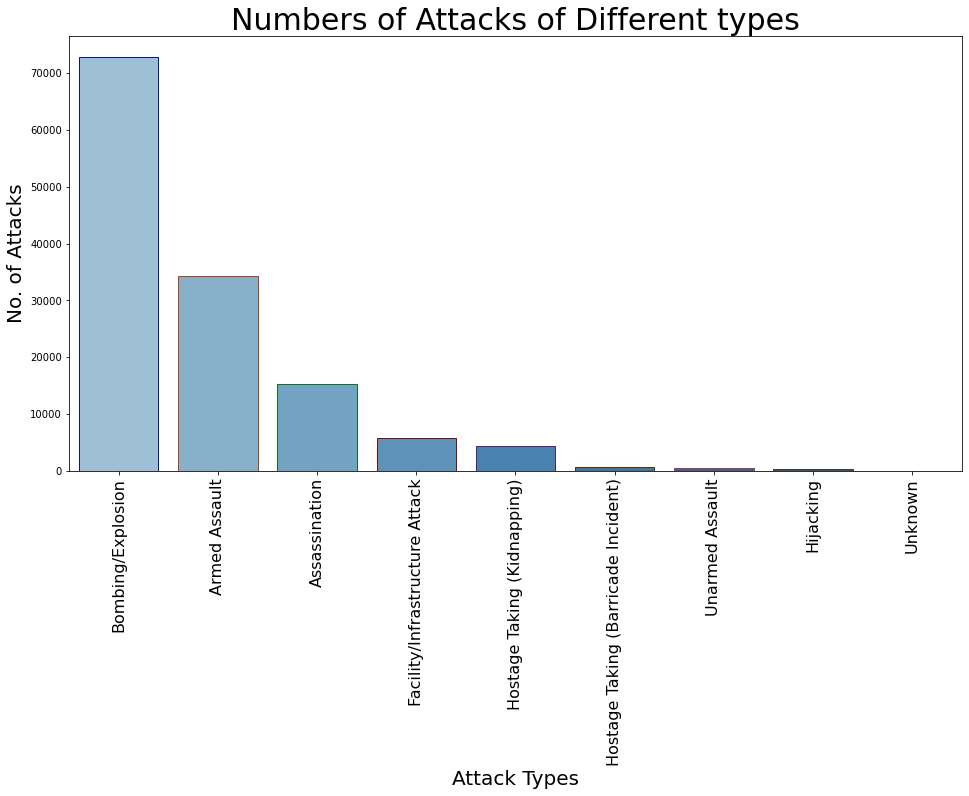

In [26]:
attack_type = data['AttackType'].value_counts().to_frame().reset_index()
attack_type.columns = ['Attack_Type', 'Total Attacks']
plt.subplots(figsize=(16,8))
sns.barplot(x=attack_type['Attack_Type'], y=attack_type['Total Attacks'], palette='Blues_d', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90,fontsize = 16)
plt.title('Numbers of Attacks of Different types',fontsize = 30)
plt.xlabel('Attack Types',fontsize= 20)
plt.ylabel('No. of Attacks',fontsize = 20)
plt.show()

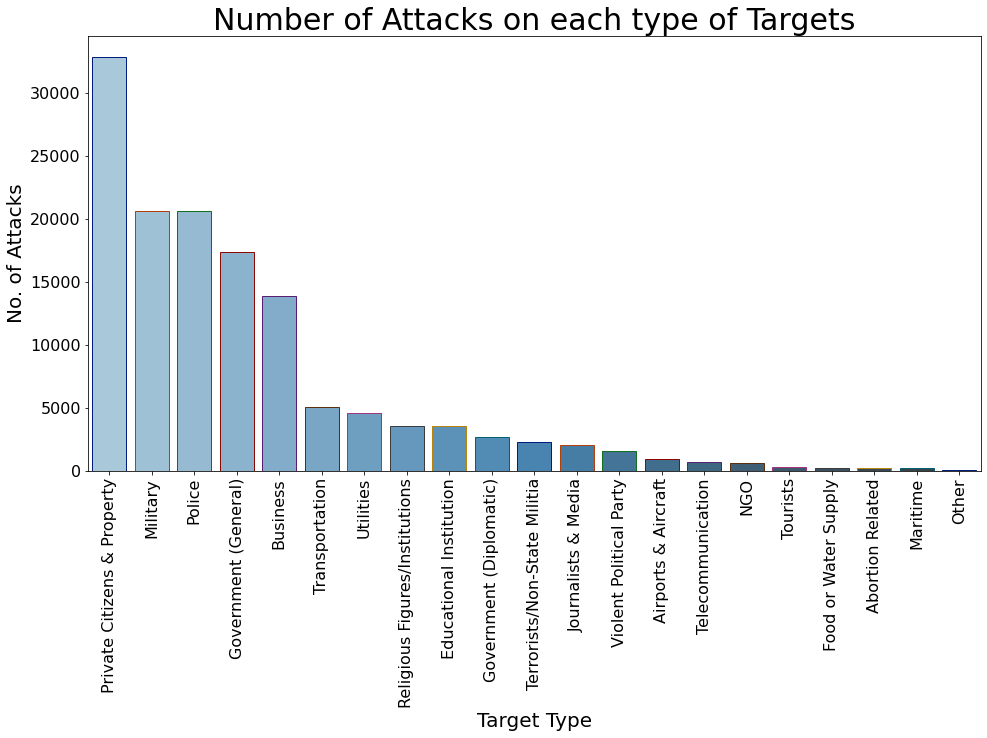

In [27]:
target_type = data['Target_type'].value_counts().to_frame().reset_index()
target_type.columns = ['Target_Type', 'Total Attacks']
plt.subplots(figsize=(16,8))
sns.barplot(x=target_type['Target_Type'], y=target_type['Total Attacks'], palette='Blues_d', edgecolor=sns.color_palette('dark',10))
plt.title('Number of Attacks on each type of Targets',fontsize=30)
plt.xlabel('Target Type',fontsize= 20)
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('No. of Attacks',fontsize = 20)
plt.show()


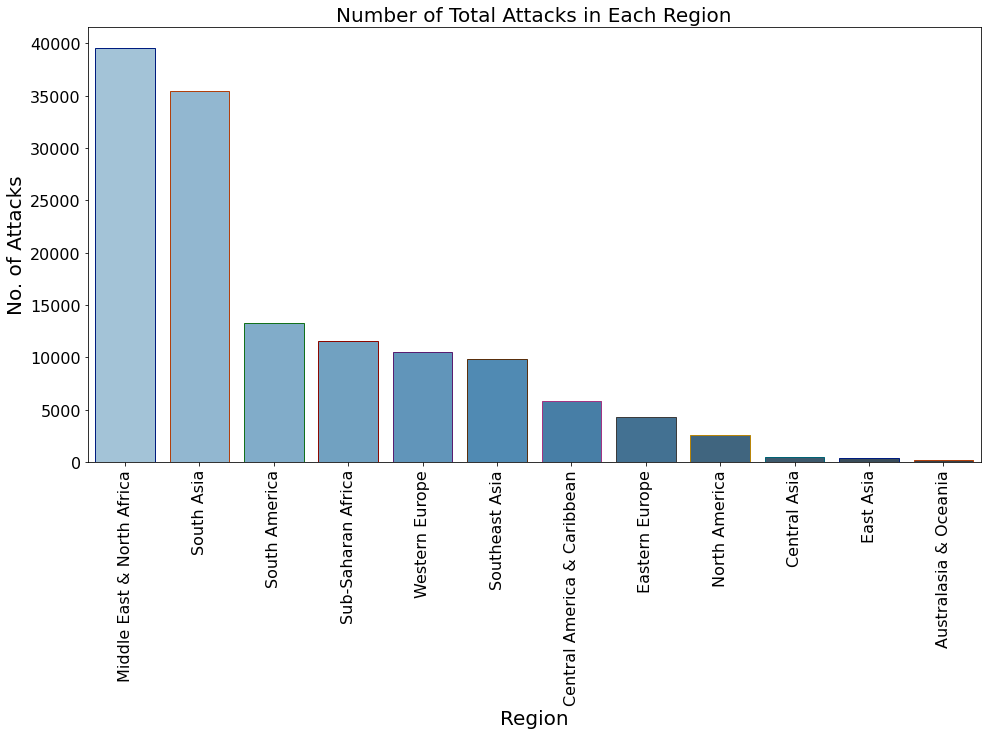

In [28]:
region_attacks = data.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(16,8))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'], palette='Blues_d', edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90,fontsize=16)
plt.xlabel('Region',fontsize= 20)
plt.yticks(fontsize = 16)
plt.ylabel('No. of Attacks',fontsize = 20)
plt.title('Number of Total Attacks in Each Region',fontsize=20)
plt.show()

This Graph clearly shows that Middle East, North Africa and South Asia Region are most Prone to terrorist attacks, and also East Asia, Central Asia and Oceania region are among the Most Peaceful Region.

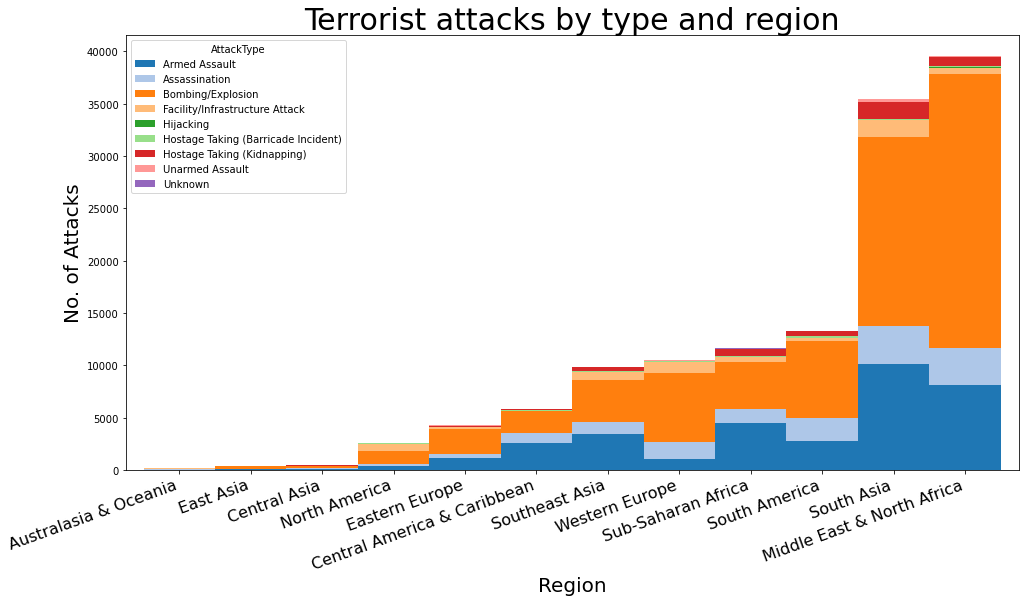

In [29]:
by_region2 = pd.crosstab(data.Region,data.AttackType,margins=True)
by_region2 = by_region2.iloc[:-1,:]
by_region2.sort_values('All',ascending=True,inplace=True)
by_region2.iloc[:,:-1].plot.bar(stacked=True,width=1,color=sns.color_palette('tab20',9))
plt.xticks(rotation=20,ha="right",fontsize=16)
plt.xlabel("Region",fontsize=20)
plt.ylabel('No. of Attacks',fontsize = 20)
plt.title("Terrorist attacks by type and region",fontsize=30)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

In [30]:
data['Casualities'] = data['Killed'] + data['Wounded']

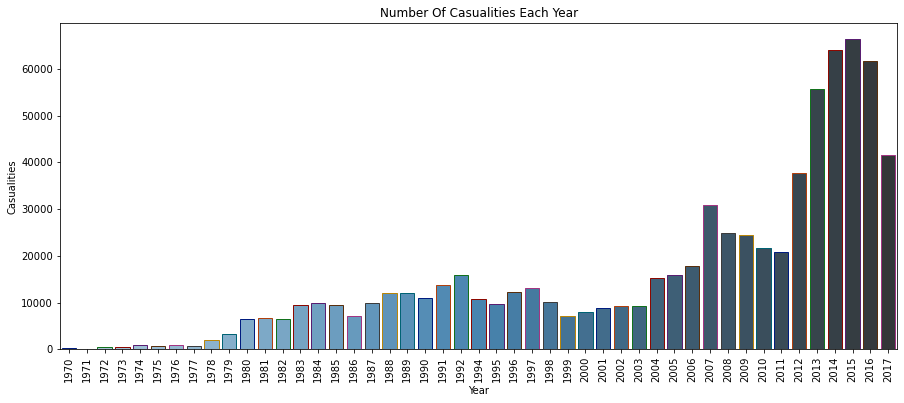

In [31]:
plt.subplots(figsize=(15,6))
year_cas = data.groupby('Year').Casualities.sum().to_frame().reset_index()
year_cas.columns = ['Year','Casualities']
sns.barplot(x=year_cas.Year, y=year_cas.Casualities, palette='Blues_d',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=90)
plt.title('Number Of Casualities Each Year')
plt.show()

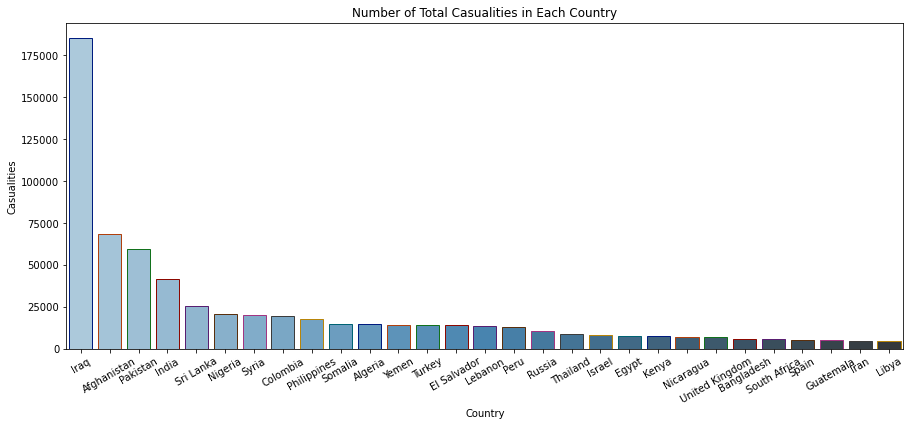

In [32]:
plt.subplots(figsize=(15,6))
count_cas = data.groupby('Country').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:29]
sns.barplot(x=count_cas.Country, y=count_cas.Casualities, palette= 'Blues_d',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities in Each Country')
plt.show()

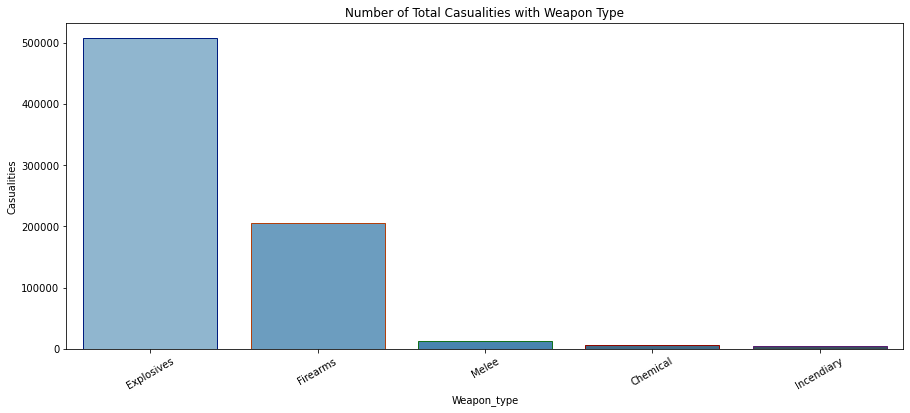

In [33]:
plt.subplots(figsize=(15,6))
count_cas = data.groupby('Weapon_type').Casualities.sum().to_frame().reset_index().sort_values('Casualities', ascending=False)[:29]
sns.barplot(x=count_cas.Weapon_type, y=count_cas.Casualities, palette= 'Blues_d',edgecolor=sns.color_palette('dark',10))
plt.xticks(rotation=30)
plt.title('Number of Total Casualities with Weapon Type')
plt.show()

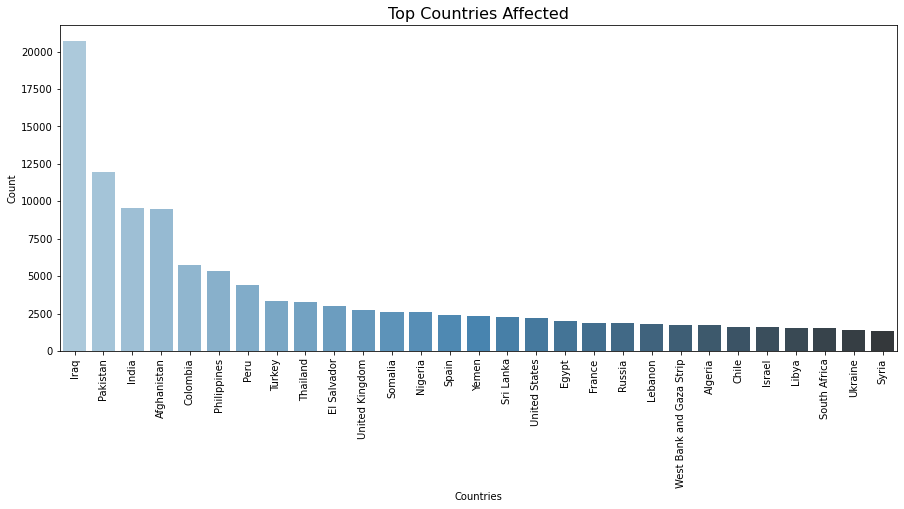

In [34]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:29].index,data['Country'].value_counts()[:29].values,palette='Blues_d')
plt.title('Top Countries Affected',fontsize=16)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

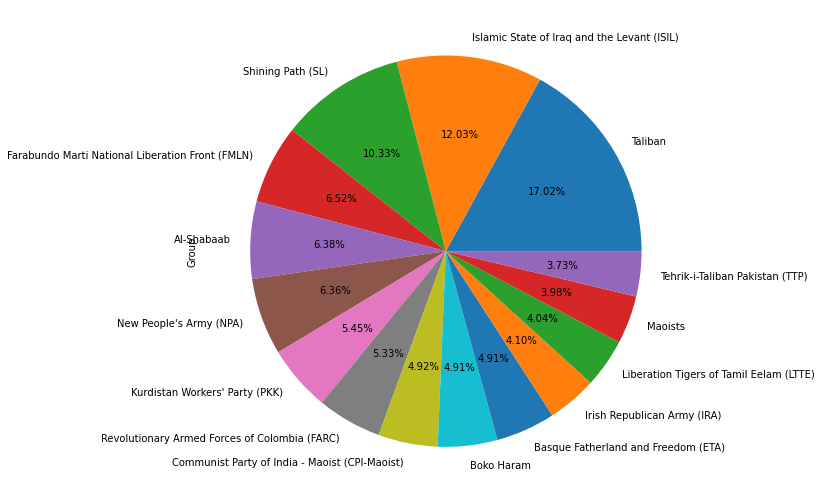

In [35]:
data['Group'].value_counts()[1:16].plot(kind='pie',figsize=(9,9),autopct='%.2f%%')
plt.show()

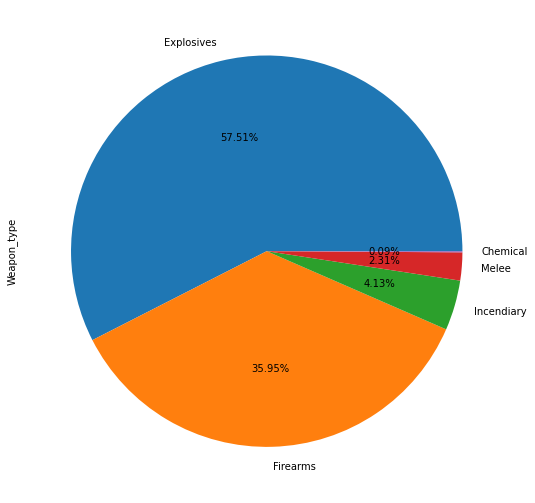

In [36]:
data['Weapon_type'].value_counts().plot(kind='pie',figsize=(9,9),autopct='%.2f%%')
plt.show()